In [19]:
from sklearn.datasets import *
from clustering.kmesar import KMESAR
from clustering.utils import create_circle, create_filled_circle, load_different_density_clusters
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [20]:
blob1, _ = make_blobs(n_samples=30, centers=1, center_box=(5, 7.5), cluster_std=0.5)
blob2, _ = make_blobs(n_samples=70, centers=1, center_box=(-8, 2.5), cluster_std=1.5)

big_circle = create_filled_circle(center=(1, 2.5), radius=2, n_samples_outer=120)
medium_circle = create_filled_circle(center=(-1, -3), radius=1.5, n_samples_outer=32)
small_circle = create_filled_circle(center=(5.8, 1.8), radius=0.9, n_samples_outer=15)
dense_circle = create_filled_circle(center=(-4.5, 5.5), radius=0.5, n_samples_outer=50)

rand = np.random.random((60, 2))
rand[:, 0] = rand[:, 0] * (8 - 2.5) + 2.5
rand[:, 1] = rand[:, 1] * (-0.5 - (-6)) + (-6)

(-10, 10)

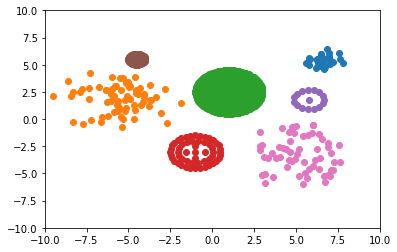

In [21]:
plt.scatter(blob1[:, 0], blob1[:, 1])
plt.scatter(blob2[:, 0], blob2[:, 1])
plt.scatter(big_circle[:, 0], big_circle[:, 1])
plt.scatter(medium_circle[:, 0], medium_circle[:, 1])
plt.scatter(small_circle[:, 0], small_circle[:, 1])
plt.scatter(dense_circle[:, 0], dense_circle[:, 1])
plt.scatter(rand[:, 0], rand[:, 1])

plt.xlim(-10, 10)
plt.ylim(-10, 10)

In [22]:
scaler = MinMaxScaler()

X = np.concatenate([blob1, blob2, big_circle, medium_circle, small_circle, dense_circle, rand])
X_scaled = scaler.fit_transform(X)

print(f'Number of samples: {X.shape[0]}')
print(X_scaled[:5, 0])

Number of samples: 1598
[0.88664218 0.88288007 0.92800908 0.92383832 0.92296957]


--------------- Algorithm details ---------------
    * Number of clusters (k): 7
    * Centroid initialization method: random
    * Initial centroids (specified): False
    * Number of initialization repetition: 20
    * Maximum iterations: 300
    * Convergence tolerance: 0.01
    * Empty clusters resolution method: sse
    * Simulated annealing on: True
    * Annealing method: random
    * Annealing probability function: sqrt
    * Annealing probability alpha: 4
    * Annealing weight function: flex
    * Annealing weight beta: 0.3
    * Convergence tracking: True
    * Annealing tracking: True
    * Tracking scaler: MinMaxScaler
-------------------------------------------------


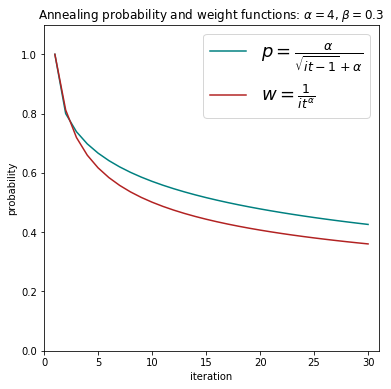

In [25]:
est = KMESAR(k_clusters=7,
             n_init=20,
             tol=1e-2,
             annealing_method='random',
             annealing_prob_function='sqrt',
             alpha=4,
             annealing_weight_function='flex',
             beta=0.3,
             convergence_tracking=True,
             annealing_tracking=True,
             tracking_scaler=scaler
             )
est.print_details()
est.plot_annealing_functions()
#

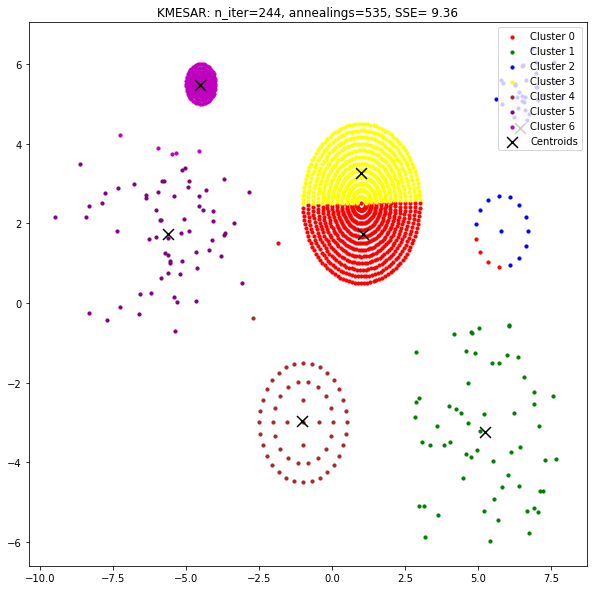

------------- KMESAR clustering -------------
    * Iterations before convergence: 244
    * Total empty cluster resolutions: 0
    * Total annealings: 535
    * Sum of squared error:  9.36
    * Time elapsed: 3min 3s
 ---------------------------------------------


In [26]:
est.fit(X_scaled)
est.plot_clustered_data(X)
est.print_clustering_info()

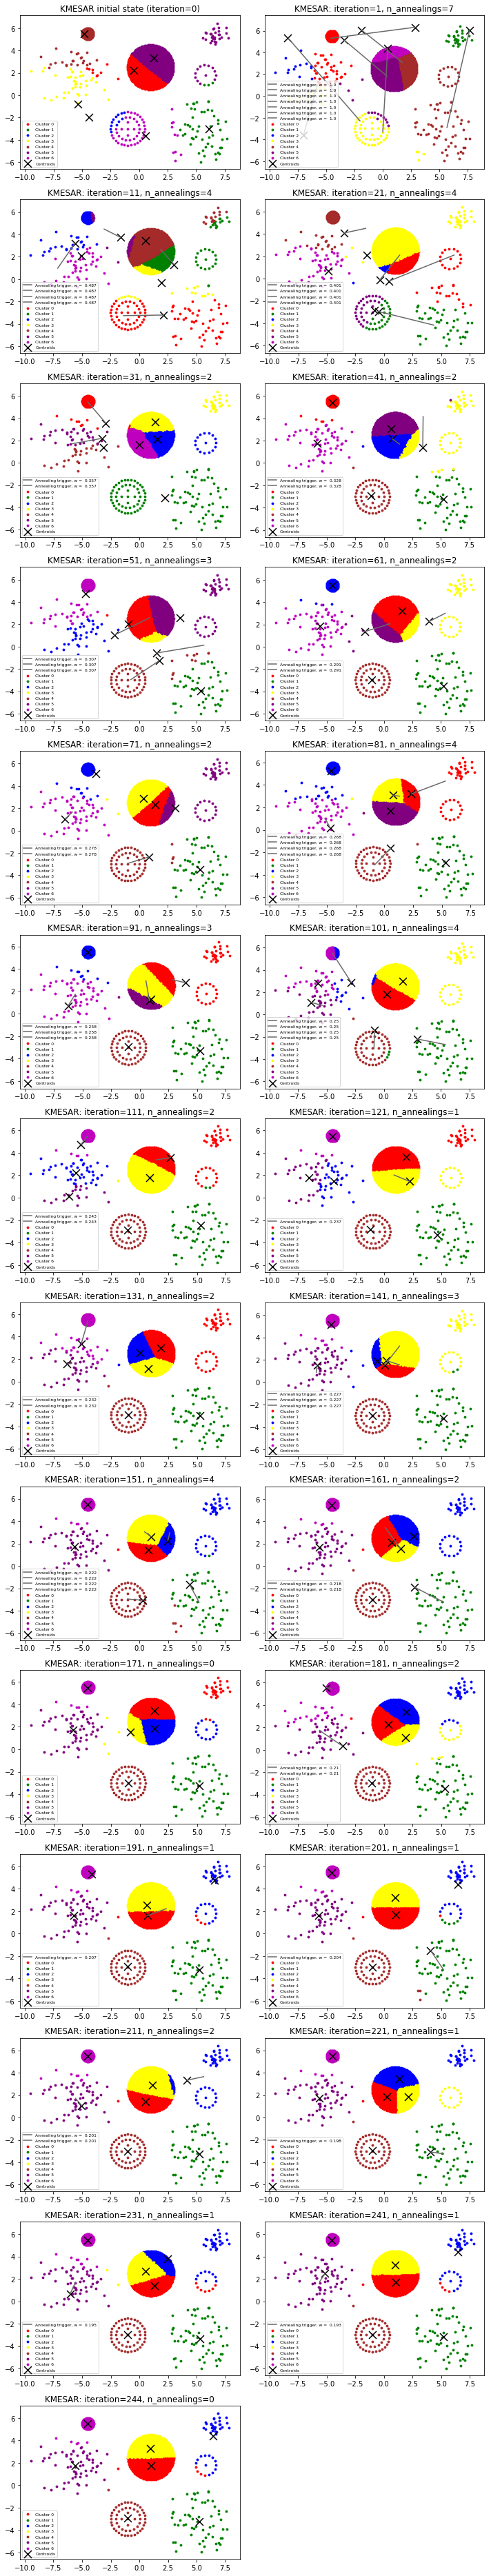

In [27]:
est.plot_tracking_history(X, show_iter_mod=10, out_file='KMESAR_density')

8.685893402271164


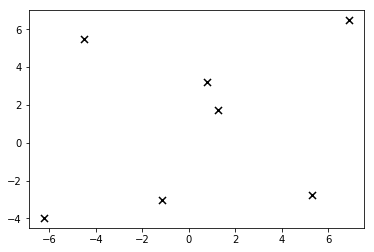

In [35]:
est_sklearn = KMeans(n_clusters=7)
est_sklearn.fit(X_scaled)

colors = ['red', 'green', 'blue', 'gold', 'm', 'teal', 'brown', 'purple', 'lightcoral']
for label in range(est_sklearn.n_clusters):
    cluster = X[np.where(est.labels_ == label)]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[label])

inv_centroids = scaler.inverse_transform(est_sklearn.cluster_centers_)
plt.scatter(inv_centroids[:, 0], inv_centroids[:, 1], c='black', s=50, marker='x')

print(est_sklearn.inertia_)

In [ ]:
print(est_sklearn.labels_)